In [1]:
import tensorflow as tf

import pandas as pd
import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras.preprocessing
#from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Add, Multiply, Subtract
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, BatchNormalization
# regularizers
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout, SpatialDropout1D
from scipy import signal
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from numpy.linalg import svd
import gc
from keijzer import *
from tensorflow import keras
from keras.models import Model
from keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
from keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout, Activation, Multiply, Embedding, Layer, Reshape
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
#from keras.ops import convert_to_tensor, convert_to_numpy
#from keras.utils import plot_model
from keras import activations
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import math

class LossHistory(tensorflow.keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.rmses = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_rmses = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.rmses.append(logs.get('root_mean_squared_error'))
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_rmses.append(logs.get('val_root_mean_squared_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))



def root_squared_mean_error(y_true, y_pred):
    return K.mean((K.abs(y_pred - y_true))*K.square(y_true-K.mean(y_true)))*100

def mse_mae(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))+K.mean(K.abs(y_pred - y_true))

from keras.layers.advanced_activations import PReLU

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '0' # 여러개 사용시 '0,1,2' 식으로 하나의 문자열에 입력
gpus = tf.config.experimental.list_physical_devices('GPU') # 호스트 러나임에 표시되는 GPU 장치 목록 반환

if gpus: # 반환된 GPU 장치 목록이 있다면
    try: # 해당 장치에 대한 메모리 증가 활성화 여부 설정
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e: # try문 실패시에 에러문구 출력
        print(e)

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Import Data & Preprocessing

In [3]:
data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2020.csv'
data_source1 = pd.read_csv(data_path)
dat_source1 = pd.DataFrame(data_source1)
#dat_source1 = dat_source1.iloc[:-3,:]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2021.csv'
data_source2 = pd.read_csv(data_path)
dat_source2 = pd.DataFrame(data_source2)
dat_source2 = dat_source2.iloc[:8761,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2022.csv'
data_source3 = pd.read_csv(data_path)
dat_source3 = pd.DataFrame(data_source3)
dat_source3 = dat_source3.iloc[:8760,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2023.csv'
data_source4 = pd.read_csv(data_path)
dat_source4 = pd.DataFrame(data_source4)
dat_source4 = dat_source4.iloc[:8760,:9]

dat_arr1 = np.array(dat_source1)
dat_arr2 = np.array(dat_source2)
dat_arr3 = np.array(dat_source3)
dat_arr4 = np.array(dat_source4)

dat_arr = np.concatenate([dat_arr1, dat_arr2, dat_arr3, dat_arr4],axis=0)
dat_arr.shape # 8784, 8761, 8760, 8760

dat_source = pd.DataFrame(dat_arr, columns=['Time-Date stamp','Date','ERCOT Load','Total Wind Output','Total Wind Installed','Wind Output, % of Load','Wind Output, % of Installed','1-hr MW change','1-hr % change'])
dat_source

,Time-Date stamp,Date,ERCOT Load,Total Wind Output,Total Wind Installed,"Wind Output, % of Load","Wind Output, % of Installed",1-hr MW change,1-hr % change
0,01-01-2020 00:00:00,Jan-01,36823,12335,27040,33.5,45.617,NaN,NaN
1,01-01-2020 01:00:00,Jan-01,36511,13300,27040,36.4,49.187,965.4,7.826
2,01-01-2020 02:00:00,Jan-01,36022,13586,27040,37.7,50.245,286.2,2.152
3,01-01-2020 03:00:00,Jan-01,35790,14107,27040,39.4,52.171,520.9,3.834
4,01-01-2020 04:00:00,Jan-01,35642,14887,27040,41.8,55.055,779.6,5.527
...,...,...,...,...,...,...,...,...,...
35060,12-31-2023 20:00:00,Dec-31,44887,17161,38631,38.23,44.42,2858,19.99
35061,12-31-2023 21:00:00,Dec-31,44013,18301,38631,41.58,47.37,1139,6.64
35062,12-31-2023 22:00:00,Dec-31,43280,18607,38631,42.99,48.17,307,1.67
35063,12-31-2023 23:00:00,Dec-31,42319,17866,38631,42.22,46.25,-741,-3.98


### Dividing by Installed Capacity & Preprocessing

In [4]:
dat = pd.DataFrame()
dat['MW % change'] = np.array(dat_source.iloc[1:,3], dtype=float)-np.array(dat_source.iloc[0:-1,3], dtype=float)
dat['MW % change'] = np.divide(np.array(dat['MW % change']),np.array(dat_source.iloc[1:,4]))*100
dat['Total Wind Output'] = np.divide(np.array(dat_source.iloc[1:,3]), np.array(dat_source.iloc[1:,4]))

dat

,MW % change,Total Wind Output
0,3.56879,0.491864
1,1.05769,0.502441
2,1.92678,0.521709
3,2.88462,0.550555
4,-0.580621,0.544749
...,...,...
35059,7.3982,0.444229
35060,2.951,0.473739
35061,0.79211,0.48166
35062,-1.91815,0.462478


In [5]:
ramp_ratio = 20
load_ratio = 10
year_arr = np.concatenate([np.ones(8784)*2020, np.ones(8760)*2021, np.ones(8760)*2022, np.ones(8760)*2023])
year_df = pd.DataFrame(year_arr, columns=['Year'], dtype=int)
wind_df = pd.concat([year_df, dat], axis=1)
wind_df

,Year,MW % change,Total Wind Output
0,2020,3.56879,0.491864
1,2020,1.05769,0.502441
2,2020,1.92678,0.521709
3,2020,2.88462,0.550555
4,2020,-0.580621,0.544749
...,...,...,...
35059,2023,7.3982,0.444229
35060,2023,2.951,0.473739
35061,2023,0.79211,0.48166
35062,2023,-1.91815,0.462478


In [6]:
wind_df = wind_df.reset_index(drop=True)

std_scaler = sklearn.preprocessing.MinMaxScaler()
std_scaler_load = sklearn.preprocessing.MinMaxScaler()
std_scaler_ramp = sklearn.preprocessing.MinMaxScaler()

wind_df[['Total Wind Output']] = std_scaler.fit_transform(wind_df[['Total Wind Output']])
wind_df[['MW % change']] = std_scaler_ramp.fit_transform(wind_df[['MW % change']])
wind_df = wind_df.iloc[:-1,:]
wind_df

,Year,MW % change,Total Wind Output
0,2020,0.620197,0.644724
1,2020,0.544580,0.658617
2,2020,0.570751,0.683924
3,2020,0.599594,0.721813
4,2020,0.495246,0.714187
...,...,...,...
35058,2023,0.774643,0.484984
35059,2023,0.735512,0.582157
35060,2023,0.601593,0.620917
35061,2023,0.536583,0.631322


In [7]:
ramp_df = pd.DataFrame(wind_df)
ramp_df.columns=['Year', 'Wind Change', 'Wind Output']
ramp_df

,Year,Wind Change,Wind Output
0,2020,0.620197,0.644724
1,2020,0.544580,0.658617
2,2020,0.570751,0.683924
3,2020,0.599594,0.721813
4,2020,0.495246,0.714187
...,...,...,...
35058,2023,0.774643,0.484984
35059,2023,0.735512,0.582157
35060,2023,0.601593,0.620917
35061,2023,0.536583,0.631322


## Wind Generation Forecasting

### SVD-based Feature Generation

In [8]:
def create_dataset(dataset, timesteps, output_timesteps):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps -output_timesteps - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[(i + timesteps):(i+timesteps+output_timesteps), :])
    return np.array(dataX), np.array(dataY)

def svdadd(X, start, end, b_size):
    dec_x = X[start:end, :, :]
    U, S, Vh = svd(dec_x.reshape(b_size, -1), full_matrices=True)

    high_sig = np.matmul(np.matmul(U[:,:high_ind], np.diag(S[0:high_ind])), Vh[:high_ind,:])
    low_sig = X[:dec_num, :, :].reshape(b_size,-1)-high_sig

    rec_x = np.zeros((b_size, b_size, high_ind))
    
    for i in range(high_ind):
        rec_x[:,:,i] = np.matmul((U[:,i]*S[i]).reshape(-1,1), Vh[i,:].reshape(1,-1))    
    return rec_x, low_sig

In [9]:
norm_df = np.array(wind_df.iloc[:,2]).reshape(-1,1)
timesteps = 24*7
output_timesteps = 24
num_features = 1
X, Y = create_dataset(norm_df, timesteps, output_timesteps)
b_size = timesteps

In [10]:
dec_num = timesteps
high_ind = 35

addX = np.zeros((X.shape[0], dec_num, high_ind+1))

for k in range(X.shape[0]//dec_num):
    rec_x, low_sig = svdadd(X, k*dec_num, (k+1)*dec_num, b_size)
    addX[k*dec_num:k*dec_num+dec_num,:, :-1] = rec_x
    addX[k*dec_num:k*dec_num+dec_num,:, -1] = low_sig
    
rec_x, low_sig = svdadd(X, X.shape[0]-dec_num, X.shape[0], b_size)
addX[X.shape[0]-dec_num:X.shape[0], :, :-1] = rec_x
addX[X.shape[0]-dec_num:X.shape[0],:, -1] = low_sig

addX_det = addX[:, :, :-1]
addX_det = np.sum(addX_det, axis=2)
X = np.concatenate([X, addX], axis=2)
num_features = X.shape[2]

### Training/Test Set Division & Shuffled Learning

In [11]:
trvaX, teX, trvaY, teY = train_test_split(X, Y, test_size=0.1, shuffle=False)

idx = np.arange(trvaX.shape[0])
np.random.shuffle(idx)
strvaX = trvaX[idx]
strvaY = trvaY[idx]
strvaY = strvaY.reshape(-1, output_timesteps)

trvaY = trvaY.reshape(-1, output_timesteps)
teY = teY.reshape(-1, output_timesteps)

trvaX.shape, trvaY.shape, teX.shape, teY.shape

((31383, 168, 37), (31383, 24), (3487, 168, 37), (3487, 24))

## Wind Generation Forecasting Basic Model

In [12]:
def MAEMS(y_true, y_pred):
    return K.mean((K.abs(y_pred - y_true))*K.square(y_true))*100

In [13]:
from keras.layers.advanced_activations import PReLU

In [16]:
num_features = trvaX.shape[2]
output_timesteps = trvaY.shape[1]

with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1.2
    beta = 1
    hfilters = 256
    hkernel_size1 = 1
    hkernel_size2 = 2
    
    visible1 = Input(shape=(timesteps, num_features))
   
    ## Attention Block
    per1 = Permute((2,1))(visible1)
    den1a = Dense(timesteps, activation='tanh')(per1)
    den1b = Dense(timesteps, activation='sigmoid')(per1)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vec')(den1)
    mul1 = Multiply()([visible1, per2])
    
    ## Series PN DCCNN Blocks 1 ~ 6
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res01a = Add()([visible1, d1])   # (100, 25) (100, 25)
    res01b = Subtract()([visible1, d1])

    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01a)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    
    d1 = Multiply()([d1a, d1b])
    res02a = Add()([res01a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01b) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    res02b = Subtract()([res01b, d2])   # (100, 25) (100, 25) 
    res02 = Concatenate()([res02a, res02b, res01a, res01b])
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res03a = Add()([res02a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    res03b = Subtract()([res02b, d2])   # (100, 25) (100, 25)
    res03 = Concatenate()([res03a, res03b, res02])
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res04a = Add()([res03a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    res04b = Subtract()([res02b, d2])   # (100, 25) (100, 25)
    res04 = Concatenate()([res04a, res04b, res03])
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res04)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res05a = Add()([res04a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res04) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    res05b = Subtract()([res04b, d2])   # (100, 25) (100, 25)
    res05 = Concatenate()([res05a, res05b, res04])
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res05)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])

    res06a = Add()([res05a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res05) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])

    res06b = Subtract()([res05b, d2])   # (100, 25) (100, 25)
    res06 = Concatenate()([res05a, res05b])
    
    res10 = Concatenate()([res02, res03, res04, res05, res06])   # 
    
    #print('res10 :', res10.shap)  # (None, 24, 11) 
    
    ## Output Block
    out = Conv1D(720, 1, padding='same', activation=PReLU())(res10)   # 256, 11X10=110
    out = Dropout(0.2)(out)   #SpatialDropout1D
    
    out = Conv1D(360, 1, padding='same', activation=PReLU())(out) # 512,  110X5=550
    out = Dropout(0.2)(out)
    
    out = GlobalAveragePooling1D()(out) # pool_size=2, strides=1
    
    out = Dense(24)(out) 
    model = Model(inputs=[visible1], outputs=[out])
    
    print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 168, 37)]    0                                            
__________________________________________________________________________________________________
permute_2 (Permute)             (None, 37, 168)      0           input_3[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 37, 168)      28392       permute_2[0][0]                  
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 37, 168)      28392       permute_2[0][0]                  
______________________________________________________________________________________________

In [17]:
gc.collect()

2821

In [18]:
    model.compile(loss=MAEMS, optimizer='adam', metrics=['mse','mae', MAEMS])
    early_stopping =EarlyStopping(monitor='val_loss', patience=50)
    batch_size = 100
    epochs = 1000
    #root_squared_mean_error
    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

In [19]:
    %%time
    b_size = 168
    hist = model.fit(strvaX, strvaY, epochs=epochs, batch_size=b_size, shuffle=False, validation_data=(teX, teY), callbacks=[history, early_stopping])  # , checkpoint

Epoch 1/1000
187/187 [==============================] - 29s 132ms/step - loss: 3.4188 - mse: 0.0797 - mae: 0.2283 - MAEMS: 3.4180 - val_loss: 2.2062 - val_mse: 0.0530 - val_mae: 0.1913 - val_MAEMS: 2.2069
Epoch 2/1000
187/187 [==============================] - 23s 124ms/step - loss: 2.8273 - mse: 0.0536 - mae: 0.1835 - MAEMS: 2.8269 - val_loss: 1.9421 - val_mse: 0.0432 - val_mae: 0.1674 - val_MAEMS: 1.9433
Epoch 3/1000
187/187 [==============================] - 23s 125ms/step - loss: 2.5705 - mse: 0.0442 - mae: 0.1623 - MAEMS: 2.5703 - val_loss: 1.8692 - val_mse: 0.0394 - val_mae: 0.1541 - val_MAEMS: 1.8697
Epoch 4/1000
187/187 [==============================] - 23s 125ms/step - loss: 2.3780 - mse: 0.0387 - mae: 0.1488 - MAEMS: 2.3778 - val_loss: 1.8606 - val_mse: 0.0328 - val_mae: 0.1393 - val_MAEMS: 1.8613
Epoch 5/1000
187/187 [==============================] - 23s 124ms/step - loss: 2.2239 - mse: 0.0347 - mae: 0.1386 - MAEMS: 2.2238 - val_loss: 1.8340 - val_mse: 0.0341 - val_mae: 0.

In [20]:
gc.collect()

4601

## Saving Results & Figures

In [54]:
loss_history = hist.history['loss']
valloss_history = hist.history['val_loss']

In [55]:
np.savetxt('losshistory.txt',(loss_history,valloss_history))
model.save('Basic Model Final.h5')

In [56]:
layer_name = 'attention_vec'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(strvaX)

In [57]:
avg_int_output = np.mean(intermediate_output, axis=0)
avg_int_output.shape

(168, 37)

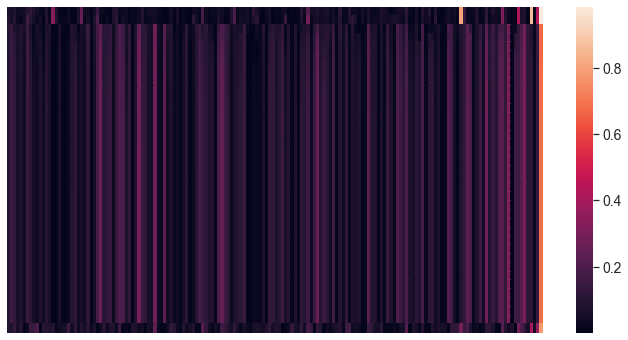

In [58]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(12, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(np.transpose(abs(avg_int_output)), cmap="rocket")
lx = ax.set_xticklabels([])
ly = ax.set_yticklabels([])
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=14)

f.savefig('attention_output.png', dpi=1000, bbox_inches="tight")
#f.savefig('attention_output.eps', dpi=1000, bbox_inches="tight")

## Basic Model Test Results

In [26]:
batch_size = 168
testPredict = model.predict(teX, batch_size=batch_size)

In [25]:
def npMAEMS(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true))*100
def npMAEMD(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true-np.mean(y_true)))*100
def npMSE(y_true, y_pred):
    return np.mean(np.square(-y_true+y_pred))
def npMAE(y_true, y_pred):
    return np.mean(abs(-y_true+y_pred))

In [28]:
tePredict = testPredict.reshape(-1)
testY = teY.reshape(-1)
print('Error Test Score > MSE == ', npMSE(testY, tePredict), ' MAE == ', npMAE(testY, tePredict), ' MAEMD == ', npMAEMD(testY, tePredict))

Error Test Score > MSE ==  0.022304163678159232  MAE ==  0.11678586553605787  RMSE ==  0.5992415351992226


## Wind Generation FFEL Model

In [ ]:
trX, vaX, trY, vaY = train_test_split(trvaX, trvaY, test_size=1/6, shuffle=False)
trY = trY.reshape(-1,output_timesteps)
vaY = vaY.reshape(-1,output_timesteps)

In [ ]:
trainPredict = model.predict(trX, batch_size=batch_size)
validPredict = model.predict(vaX, batch_size=batch_size)

In [29]:
e_tr = trainPredict - trY
e_va = validPredict - vaY
errors = np.vstack([e_tr, e_va])
prediction = np.vstack([trainPredict, validPredict])
print(errors.shape)
print(prediction.shape)

(31383, 24)
(31383, 24)


In [30]:
norm_df2 = pd.DataFrame(norm_df).iloc[:prediction.shape[0], :]
norm_df2.columns = ['Normalized Wind']
norm_df2.head()

,Normalized Wind
0,0.644724
1,0.658617
2,0.683924
3,0.721813
4,0.714187


In [31]:
Prindex = ['Prediction1', 'Prediction2','Prediction3','Prediction4','Prediction5','Prediction6','Prediction7','Prediction8','Prediction9','Prediction10','Prediction11','Prediction12','Prediction13', 'Prediction14','Prediction15','Prediction16','Prediction17','Prediction18','Prediction19','Prediction20','Prediction21','Prediction22','Prediction23','Prediction24']
Erindex = ['Error1', 'Error2','Error3','Error4','Error5','Error6','Error7','Error8','Error9','Error10','Error11','Error12','Error13', 'Error14','Error15','Error16','Error17','Error18','Error19','Error20','Error21','Error22','Error23','Error24']

pr_df = pd.DataFrame(prediction, columns=Prindex)
pr_df

,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,Prediction10,...,Prediction15,Prediction16,Prediction17,Prediction18,Prediction19,Prediction20,Prediction21,Prediction22,Prediction23,Prediction24
0,0.774323,0.741381,0.716587,0.704542,0.702208,0.711486,0.737553,0.760536,0.794829,0.826910,...,0.832913,0.828458,0.830511,0.853066,0.859240,0.882404,0.874423,0.865727,0.833718,0.795401
1,0.764127,0.737782,0.717069,0.706137,0.706868,0.719355,0.743654,0.768242,0.804386,0.838177,...,0.835655,0.838367,0.847813,0.874759,0.879679,0.886548,0.871498,0.850968,0.815019,0.780045
2,0.752948,0.734132,0.715556,0.709176,0.713454,0.730152,0.755751,0.778668,0.810655,0.836297,...,0.826571,0.839288,0.856169,0.881345,0.877601,0.862094,0.836676,0.805359,0.776427,0.753055
3,0.729778,0.721467,0.710995,0.715731,0.727765,0.750957,0.778807,0.797437,0.821257,0.833073,...,0.827637,0.852442,0.866569,0.880208,0.862129,0.825838,0.791640,0.758721,0.744271,0.732090
4,0.722633,0.719223,0.715027,0.729678,0.749921,0.779671,0.809938,0.823806,0.839648,0.838092,...,0.846047,0.874661,0.880321,0.877164,0.848665,0.801491,0.768298,0.740075,0.738649,0.733531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31378,0.376301,0.341228,0.319505,0.310303,0.314865,0.326736,0.352924,0.373706,0.408372,0.445486,...,0.598495,0.578913,0.547662,0.519708,0.490836,0.472754,0.459206,0.448720,0.437797,0.413605
31379,0.262524,0.235267,0.226003,0.225839,0.247815,0.276644,0.321980,0.359763,0.413376,0.463116,...,0.544097,0.522187,0.492307,0.477045,0.468451,0.454459,0.444752,0.424632,0.395457,0.348371
31380,0.198896,0.184548,0.189877,0.203966,0.243088,0.292439,0.358887,0.417500,0.479625,0.530141,...,0.505905,0.487680,0.466984,0.461306,0.460752,0.438507,0.420627,0.389640,0.351018,0.297561
31381,0.192597,0.192868,0.211282,0.236224,0.281869,0.347085,0.425092,0.495405,0.557406,0.593775,...,0.493684,0.482293,0.476060,0.470693,0.467005,0.426835,0.396173,0.359456,0.322311,0.278880


In [32]:
er_df = pd.DataFrame(errors, columns=Erindex)
er_df

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,-0.025016,-0.075785,-0.083432,-0.082604,-0.049139,-0.036849,-0.070092,-0.069356,0.018418,0.041610,...,-0.040843,-0.060259,-0.061995,-0.051778,-0.073923,-0.054742,-0.080259,-0.101488,-0.105032,-0.083052
1,-0.053039,-0.062237,-0.070078,-0.045209,-0.041467,-0.088291,-0.086239,-0.008169,0.019085,-0.029945,...,-0.053062,-0.054139,-0.057031,-0.058404,-0.057467,-0.068135,-0.095716,-0.087782,-0.063434,-0.081774
2,-0.047071,-0.053014,-0.035790,-0.039159,-0.094191,-0.099740,-0.020661,-0.006633,-0.057466,-0.024538,...,-0.065935,-0.065556,-0.076994,-0.055802,-0.077081,-0.105121,-0.102074,-0.073095,-0.085392,-0.087067
3,-0.057368,-0.029879,-0.037340,-0.091914,-0.102128,-0.025454,-0.006493,-0.070684,-0.039578,-0.027131,...,-0.077207,-0.080721,-0.070578,-0.074474,-0.105086,-0.112911,-0.086813,-0.103097,-0.095851,-0.095448
4,-0.028714,-0.029112,-0.092618,-0.100215,-0.026491,-0.005630,-0.058183,-0.037029,-0.020556,-0.029058,...,-0.087116,-0.062485,-0.074361,-0.090051,-0.090085,-0.076962,-0.093521,-0.100047,-0.088889,-0.076746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31378,0.005052,0.025933,0.056190,0.063513,0.061451,0.053974,0.029751,-0.008594,-0.037586,-0.069082,...,0.154837,0.169037,0.052722,-0.007410,-0.006683,-0.019815,-0.049574,-0.027185,-0.026952,0.018510
31379,-0.052770,-0.028048,-0.020787,-0.027575,-0.024948,-0.046530,-0.060320,-0.086196,-0.101191,-0.125533,...,0.134221,0.027248,-0.034811,-0.020475,-0.024119,-0.054321,-0.031153,-0.040117,0.000363,0.032972
31380,-0.064419,-0.062242,-0.063537,-0.068797,-0.080085,-0.089861,-0.087071,-0.097068,-0.109024,-0.098426,...,0.010965,-0.039438,-0.030536,-0.031263,-0.048028,-0.037398,-0.044122,-0.005455,0.035619,0.039266
31381,-0.054194,-0.060546,-0.061481,-0.086949,-0.100431,-0.098874,-0.089475,-0.093245,-0.071161,-0.020603,...,-0.033434,-0.015227,-0.016509,-0.038087,-0.008900,-0.037914,0.001079,0.044057,0.064016,0.052903


In [33]:
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2.head()

,Normalized Wind,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,0.644724,0.774323,0.741381,0.716587,0.704542,0.702208,0.711486,0.737553,0.760536,0.794829,...,-0.040843,-0.060259,-0.061995,-0.051778,-0.073923,-0.054742,-0.080259,-0.101488,-0.105032,-0.083052
1,0.658617,0.764127,0.737782,0.717069,0.706137,0.706868,0.719355,0.743654,0.768242,0.804386,...,-0.053062,-0.054139,-0.057031,-0.058404,-0.057467,-0.068135,-0.095716,-0.087782,-0.063434,-0.081774
2,0.683924,0.752948,0.734132,0.715556,0.709176,0.713454,0.730152,0.755751,0.778668,0.810655,...,-0.065935,-0.065556,-0.076994,-0.055802,-0.077081,-0.105121,-0.102074,-0.073095,-0.085392,-0.087067
3,0.721813,0.729778,0.721467,0.710995,0.715731,0.727765,0.750957,0.778807,0.797437,0.821257,...,-0.077207,-0.080721,-0.070578,-0.074474,-0.105086,-0.112911,-0.086813,-0.103097,-0.095851,-0.095448
4,0.714187,0.722633,0.719223,0.715027,0.729678,0.749921,0.779671,0.809938,0.823806,0.839648,...,-0.087116,-0.062485,-0.074361,-0.090051,-0.090085,-0.076962,-0.093521,-0.100047,-0.088889,-0.076746


In [34]:
norm_df22 = pd.DataFrame(norm_df).iloc[prediction.shape[0]+timesteps:, :]
norm_df22.columns = ['Normalized Wind']
npnorm22 = np.array(norm_df22)

In [35]:
pr_df = pd.DataFrame(tePredict.reshape(-1,24))
pr_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.247611,0.264004,0.295378,0.340294,0.397206,0.476981,0.555980,0.612252,0.644406,0.639012,...,0.528575,0.535129,0.544030,0.532309,0.495391,0.424992,0.368086,0.324650,0.306843,0.284149
1,0.259947,0.282110,0.321609,0.381457,0.452726,0.535357,0.609359,0.649634,0.657759,0.636575,...,0.555947,0.562837,0.561606,0.536782,0.484978,0.411580,0.357064,0.319764,0.313551,0.299435
2,0.317199,0.347193,0.394371,0.460599,0.533121,0.599056,0.652459,0.668103,0.650857,0.621986,...,0.577066,0.573343,0.552232,0.515163,0.456278,0.395760,0.356408,0.336366,0.348964,0.346879
3,0.406243,0.446613,0.498657,0.557627,0.608931,0.643542,0.662986,0.651456,0.618666,0.592764,...,0.567849,0.550273,0.517917,0.479423,0.433545,0.395397,0.371723,0.370379,0.397059,0.409072
4,0.499609,0.557822,0.609756,0.651419,0.666574,0.662269,0.647671,0.618445,0.589127,0.570585,...,0.538921,0.513423,0.477917,0.448328,0.423249,0.402825,0.388871,0.392530,0.420063,0.444472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,0.284534,0.343144,0.402274,0.442910,0.455449,0.461330,0.470786,0.470959,0.466618,0.459793,...,0.423174,0.424606,0.423632,0.424239,0.431224,0.432175,0.442301,0.467610,0.491154,0.496676
3483,0.337997,0.384219,0.428044,0.450970,0.446364,0.442964,0.445539,0.449591,0.446811,0.438624,...,0.401414,0.405412,0.405174,0.411310,0.414890,0.412157,0.420535,0.443814,0.474875,0.483649
3484,0.426191,0.444796,0.457980,0.449922,0.424813,0.415106,0.416662,0.427175,0.429480,0.421655,...,0.380661,0.393294,0.399049,0.409087,0.405630,0.394243,0.396697,0.414684,0.450230,0.466181
3485,0.520418,0.507098,0.485686,0.448044,0.408167,0.397024,0.401413,0.417858,0.423466,0.419017,...,0.394453,0.417433,0.430702,0.441706,0.436794,0.421682,0.421983,0.437653,0.473951,0.492936


In [36]:
teY = testY.reshape(-1,24)
e_te = testPredict-teY
er_df = pd.DataFrame(e_te, columns=Erindex)
er_df

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,-0.025152,-0.059169,-0.086922,-0.105664,-0.117361,-0.111668,-0.072587,-0.002126,0.105017,0.195354,...,0.036005,0.026349,0.068125,0.067560,0.100296,0.109592,0.109791,0.098673,0.067444,0.031502
1,-0.063227,-0.100190,-0.124349,-0.133111,-0.135924,-0.093210,-0.005019,0.110245,0.214102,0.226699,...,0.047167,0.086932,0.096857,0.141688,0.169579,0.153286,0.131086,0.080365,0.060904,0.022698
2,-0.065101,-0.098766,-0.120196,-0.128050,-0.095446,-0.015322,0.113070,0.224445,0.240981,0.127046,...,0.101161,0.108593,0.157137,0.199763,0.197983,0.169782,0.117008,0.083719,0.072227,0.009551
3,-0.039715,-0.067955,-0.089993,-0.070940,-0.005447,0.104153,0.219329,0.241580,0.123726,0.065646,...,0.103100,0.155179,0.202517,0.221129,0.207567,0.155997,0.119076,0.093642,0.059731,0.024925
4,-0.014958,-0.030828,-0.018811,0.037041,0.127185,0.218611,0.237795,0.123505,0.062009,0.073066,...,0.143826,0.198024,0.219623,0.222350,0.183849,0.150177,0.112134,0.055202,0.035915,0.029576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,0.054111,-0.032766,-0.126196,-0.209254,-0.295928,-0.338872,-0.351584,-0.334105,-0.304751,-0.271728,...,-0.048482,-0.008425,0.120448,0.145196,0.116243,0.134227,0.160606,0.174015,0.179981,0.155651
3483,-0.037913,-0.144251,-0.224120,-0.300407,-0.353838,-0.379406,-0.359524,-0.321779,-0.284710,-0.260562,...,-0.031617,0.102229,0.126131,0.096329,0.116942,0.130462,0.126939,0.132640,0.133849,0.112907
3484,-0.102279,-0.207368,-0.293397,-0.350279,-0.397557,-0.389958,-0.354707,-0.304346,-0.269706,-0.230373,...,0.077477,0.114251,0.084068,0.111139,0.123935,0.100647,0.085524,0.073658,0.079488,-0.018803
3485,-0.131746,-0.244280,-0.314516,-0.374326,-0.396897,-0.374345,-0.330108,-0.281328,-0.228562,-0.187110,...,0.115410,0.102452,0.132755,0.160011,0.143198,0.110509,0.080957,0.066911,-0.011033,-0.089221


In [37]:
prnorm = np.array(pr_df)
ernorm =np.array(er_df)
print(ernorm.shape)

(3487, 24)


In [38]:
etedat = np.concatenate((npnorm22[:prnorm.shape[0],:], prnorm, ernorm), axis=1)
etedat[169:171,:]

array([[ 0.50811783,  0.4704656 ,  0.48071399,  0.48790419,  0.49578348,
         0.4992941 ,  0.50634456,  0.51036179,  0.51579267,  0.52419811,
         0.51140893,  0.50170243,  0.49157917,  0.47797626,  0.47038782,
         0.46269685,  0.45493549,  0.44939682,  0.44489545,  0.44410384,
         0.43786734,  0.43337652,  0.44088262,  0.45506158,  0.4613336 ,
        -0.03765223, -0.07962751, -0.10928673, -0.06183877, -0.00976501,
         0.03207798,  0.07353729,  0.11525978,  0.16584857,  0.19283723,
         0.22001501,  0.25538701,  0.2756005 ,  0.29764498,  0.31278879,
         0.34633922,  0.31510706,  0.31953042,  0.35984143,  0.37783421,
         0.38429013,  0.38726414,  0.38770737,  0.36072079],
       [ 0.56034151,  0.52175081,  0.53601712,  0.55225676,  0.56086314,
         0.55998719,  0.5562647 ,  0.54811174,  0.54038852,  0.53816265,
         0.51849908,  0.50560772,  0.49681836,  0.48172596,  0.47437435,
         0.46129227,  0.45501441,  0.44854352,  0.44340152,  0.

In [39]:
output_timesteps = 1
eteX, eteY = create_dataset(etedat, timesteps, output_timesteps)
eteY.shape

(3317, 1, 49)

In [40]:
eteY = eteY[:,:,-24:].reshape(-1,24)

In [41]:
norm_df2 = np.array(norm_df2)
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps)
Ye.shape

(31213, 1, 49)

In [42]:
Ye = Ye[:,:,-24:].reshape(-1,24)
print(Xe.shape)
print(Ye.shape)

(31213, 168, 49)
(31213, 24)


In [43]:
gc.collect()

4195

In [44]:
idx = np.arange(Xe.shape[0])
np.random.shuffle(idx)
Xe = Xe[idx]
Ye = Ye[idx]

In [45]:
eteX.shape, eteY.shape, Xe.shape, Ye.shape

((3317, 168, 49), (3317, 24), (31213, 168, 49), (31213, 24))

In [46]:
def mse_mae(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))*10+K.mean(K.abs(y_pred - y_true))

In [47]:
num_features = Xe.shape[2]

with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1.2
    beta = 1
    hfilters = 256
    hkernel_size1 = 1
    hkernel_size2 = 2
    visible1e = Input(shape=(timesteps, num_features))
   
    per1e = Permute((2,1))(visible1e)
    den1ae = Dense(timesteps, activation='tanh')(per1e)
    den1be = Dense(timesteps, activation='sigmoid')(per1e)
    den1e = Multiply()([den1ae, den1be])
    per2e = Permute((2,1), name='attention_vec')(den1e)
    mul1e = Multiply()([visible1e, per2e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    res01ae = Add()([visible1e, d1e])   # (100, 25) (100, 25)
    res01be = Subtract()([visible1e, d1e])

    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01ae)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    
    d1e = Multiply()([d1ae, d1be])
    res02ae = Add()([res01ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01be) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res02be = Subtract()([res01be, d2e])   # (100, 25) (100, 25) 
    res02e = Concatenate()([res02ae, res02be, res01ae, res01be])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    res03ae = Add()([res02ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res03be = Subtract()([res02be, d2e])   # (100, 25) (100, 25)
    res03e = Concatenate()([res03ae, res03be, res02e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    res04ae = Add()([res03ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res04be = Subtract()([res02be, d2e])   # (100, 25) (100, 25)
    res04e = Concatenate()([res04ae, res04be, res03e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res04e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    res05ae = Add()([res04ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res04e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res05be = Subtract()([res04be, d2e])   # (100, 25) (100, 25)
    res05e = Concatenate()([res05ae, res05be, res04e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res05e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])

    res06ae = Add()([res05ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res05e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])

    res06be = Subtract()([res05be, d2e])   # (100, 25) (100, 25)
    res06e = Concatenate()([res05ae, res05be])
    
    res10e = Concatenate()([res02e, res03e, res04e, res05e, res06e])   # 
    
    #print('res10 :', res10.shape)  # (None, 24, 11) 
    
    oute = Conv1D(720, 1, padding='same', activation=PReLU())(res10e)   # 256, 11X10=110
    oute = Dropout(0.2)(oute)   #SpatialDropout1D
    
    oute = Conv1D(360, 1, padding='same', activation=PReLU())(oute) # 512,  110X5=550
    oute = Dropout(0.2)(oute)
    
    oute = GlobalAveragePooling1D()(oute) # pool_size=2, strides=1
    
    oute = Dense(24)(oute) 
    modele = Model(inputs=[visible1e], outputs=[oute])
    
    print(modele.summary())
    
    modele.compile(loss=mse_mae, optimizer='adam', metrics=['mse','mae','mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=50)
    batch_size = 100
    epochs = 1000

    history_e = LossHistory()
    history_e.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 168, 49)]    0                                            
__________________________________________________________________________________________________
permute_3 (Permute)             (None, 49, 168)      0           input_4[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 49, 168)      28392       permute_3[0][0]                  
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 49, 168)      28392       permute_3[0][0]                  
____________________________________________________________________________________________

In [48]:
gc.collect()

2538

In [49]:
# %%time
    histe = modele.fit(Xe, Ye, epochs=epochs, batch_size=b_size, shuffle=False, validation_data=(eteX, eteY), callbacks=[history_e, early_stopping])  # , checkpoint

Epoch 1/1000
186/186 [==============================] - 31s 147ms/step - loss: 0.1422 - mse: 0.0090 - mae: 0.0517 - mape: 1072.9917 - val_loss: 0.1486 - val_mse: 0.0080 - val_mae: 0.0689 - val_mape: 366.2673
Epoch 2/1000
186/186 [==============================] - 26s 137ms/step - loss: 0.0452 - mse: 0.0016 - mae: 0.0295 - mape: 476.7033 - val_loss: 0.0845 - val_mse: 0.0038 - val_mae: 0.0462 - val_mape: 198.3948
Epoch 3/1000
186/186 [==============================] - 26s 137ms/step - loss: 0.0328 - mse: 9.5047e-04 - mae: 0.0233 - mape: 415.8075 - val_loss: 0.0666 - val_mse: 0.0028 - val_mae: 0.0391 - val_mape: 195.7670
Epoch 4/1000
186/186 [==============================] - 25s 136ms/step - loss: 0.0272 - mse: 7.0617e-04 - mae: 0.0201 - mape: 325.4146 - val_loss: 0.0543 - val_mse: 0.0021 - val_mae: 0.0334 - val_mape: 234.8499
Epoch 5/1000
186/186 [==============================] - 25s 136ms/step - loss: 0.0240 - mse: 5.8029e-04 - mae: 0.0182 - mape: 297.9801 - val_loss: 0.0542 - val_mse

### Saving FFEL Model Training Results

In [59]:
eloss_history = histe.history['loss']
valeloss_history = histe.history['val_loss']

In [60]:
np.savetxt('elosshistory.txt',(eloss_history, valeloss_history))

In [61]:
gc.collect()

4193

In [63]:
modele.save('Error Learning Model.h5')

## FFEL Model Test Results

In [50]:
batch_size = 168
trainePredict = modele.predict(Xe, batch_size=batch_size)
etePredict = modele.predict(eteX, batch_size=batch_size)

In [51]:
trePredict = trainePredict.reshape([-1])
trainYe = Ye.reshape([-1])

print('Error Training Score > MSE == ', (np.mean(np.square(trainYe-trePredict))), ' MAE == ', mean_absolute_error(trainYe,trePredict), ' RMSE == ', np.sqrt(np.mean(np.square(trainYe-trePredict))))

Error Training Score > MSE ==  0.00012109809416136521  MAE ==  0.007840872043127885  RMSE ==  0.011004457922195223


In [52]:
etestPredict = etePredict.reshape([-1])
testYe = eteY.reshape([-1])

print('Error Training Score > MSE == ', (np.mean(np.square(testYe-etestPredict))), ' MAE == ', mean_absolute_error(testYe,etestPredict), ' RMSE == ', np.sqrt(np.mean(np.square(testYe-etestPredict))))

Error Training Score > MSE ==  0.0018273311390400672  MAE ==  0.03202747032164778  RMSE ==  0.042747293938214


## Final Prediction Results

In [53]:
testPredict = tePredict.reshape(-1,24)
addtestPredict = -etePredict + testPredict[timesteps:-2,:]
print(addtestPredict.shape)

(3317, 24)


In [54]:
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-testPredict[timesteps:-2,:]))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]), 'MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]))
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-addtestPredict))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], addtestPredict), 'MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], addtestPredict))

Error Test Score > MSE ==  0.022425848960914766  MAE ==  0.11691428047581572 MAPE ==  63.64561285557148
Error Test Score > MSE ==  0.0018273311357062986  MAE ==  0.03202747024719184 MAPE ==  13.158986826378207
